In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MEDIQA-CORR-2024-MS-TrainingData.csv to MEDIQA-CORR-2024-MS-TrainingData.csv


In [3]:
df = pd.read_csv('MEDIQA-CORR-2024-MS-TrainingData.csv', delimiter=',', encoding='utf-8')
df= df.drop(['Error Sentence ID', 'Error Sentence', 'Corrected Sentence', 'Corrected Text'], axis=1)
df.head()

,Unnamed: 0,Text ID,Text,Sentences,Error Flag
0,0,ms-train-0,A 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,1
1,1,ms-train-1,A 53-year-old man comes to the physician becau...,0 A 53-year-old man comes to the physician bec...,0
2,2,ms-train-2,A 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,1
3,3,ms-train-3,A 9-year-old girl is brought to the pediatrici...,0 A 9-year-old girl is brought to the pediatri...,0
4,4,ms-train-4,Blood cultures are sent to the laboratory. Int...,0 Blood cultures are sent to the laboratory.\n...,1


In [4]:
# Analizamos las primeras 5 columnas para obtener sus tipos de datos y otras características
column_info = df.dtypes

# Analizamos los nombres de las columnas para identificar las primeras 5
column_names = df.columns[:5]

# Extraemos ejemplos de datos de las primeras 5 columnas para entender mejor su contenido
sample_data = df.head()

column_info[:5], column_names, sample_data

(Unnamed: 0     int64
 Text ID       object
 Text          object
 Sentences     object
 Error Flag     int64
 dtype: object,
 Index(['Unnamed: 0', 'Text ID', 'Text', 'Sentences', 'Error Flag'], dtype='object'),
    Unnamed: 0     Text ID                                               Text  \
 0           0  ms-train-0  A 53-year-old man comes to the physician becau...   
 1           1  ms-train-1  A 53-year-old man comes to the physician becau...   
 2           2  ms-train-2  A 9-year-old girl is brought to the pediatrici...   
 3           3  ms-train-3  A 9-year-old girl is brought to the pediatrici...   
 4           4  ms-train-4  Blood cultures are sent to the laboratory. Int...   
 
                                            Sentences  Error Flag  
 0  0 A 53-year-old man comes to the physician bec...           1  
 1  0 A 53-year-old man comes to the physician bec...           0  
 2  0 A 9-year-old girl is brought to the pediatri...           1  
 3  0 A 9-year-old girl is b

In [5]:
# Revisar los valores nulos
df.replace('', np.nan, inplace=True)

# Lista de columnas a revisar
columns_to_check = ['Unnamed: 0', 'Text ID', 'Text', 'Sentences', 'Error Flag']

#  Iterar sobre cada columna y contar los valores nulos
for column in columns_to_check:
    # Contar los valores nulos en la columna
    missing_count = df[column].isnull().sum()
    print(f'Número de datos faltantes en {column}: {missing_count}')


Número de datos faltantes en Unnamed: 0: 0
Número de datos faltantes en Text ID: 0
Número de datos faltantes en Text: 0
Número de datos faltantes en Sentences: 0
Número de datos faltantes en Error Flag: 0


In [6]:
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [7]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "â€\x9d": " ",
    ".â€\x9d": ".",
    "â€“": "-",
    "â€œsomething": "something",
    "patientâ€™s": "patients",
    "â‰¥": "≥",
    "\n": ",",
    "â€œ": "",
    "Waldenstromâ€™s": "Waldenströms",
    "Âµmol/L": "µmol/L",
    "â€œmemory": "memory",
    "weeksâ€™": "weeks",
    "74 Î¼m3": "74 μm^3",
    "ÂµIU/L": "µIU/L",
    "â‰¤": "≤",
    "Clâˆ’": "Cl-",
    "physicianâ€™s": "physicians",
    "ÂºF": "ºF",
    "âˆ’": "-",
    "Â½": "½",
    "Î¼g/dL": "μg/dL",
    "pediatricianâ€™s": "pediatricians",
    "yearsâ€™": "years",
    "Âµg": "µg",
    "â€": "",
    "Kennedyâ€™s": "Kennedys",
    "Kennedy™s": "Kennedys",
    "can™t": "can't",
    "Î²": "β",
    "Ã—": "x",
    "ÃŸ-hCG": "β-hCG",
    "SÃ©quard": "Séquard",
    "Î³": "γ",
    "Î¼m3": "μm^3",
    "Î±": "α",
    "Î¼U/mL": "μU/mL",
    "Î¼": "μ",
    "'": " ",
    "\"":"" #Este lo dejo a consideracion, dependiendo si les funciona o no
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    df['Text'] = df['Text'].str.replace(old, new, regex=False)

# Verificar el reemplazo
df['Text'].head()


0    A 53-year-old man comes to the physician becau...
1    A 53-year-old man comes to the physician becau...
2    A 9-year-old girl is brought to the pediatrici...
3    A 9-year-old girl is brought to the pediatrici...
4    Blood cultures are sent to the laboratory. Int...
Name: Text, dtype: object

In [8]:
import pandas as pd
import re

# Suponiendo que df es tu DataFrame

# Función para aplicar todas las transformaciones no regex en una sola pasada
def optimize_text(text):
    # Aplicar transformaciones no regex
    text = text.strip().replace("Cl- ", "Cl ").replace("'", "").replace("’", "")
    text = text.replace(":,", ":").replace(',_', ',').replace('[', '').replace(']', '')
    text = text.replace(';', ',').replace('.,', '.').replace('mg dl', 'mg/dl')
    text = text.replace('é', 'e').replace('patient s', 'patients').replace('girl s', 'girls')
    text = text.replace('gilbert s', 'gilberts').replace(".'", ".").replace(",'", ",")
    text = text.replace("',", ",").lower()  # Convertir a minúsculas aquí para optimizar
    return text

# Aplicar optimizaciones no regex
df['Text'] = df['Text'].apply(optimize_text)

# Aplicar optimizaciones con regex
df['Text'] = df['Text'].str.replace(r',,', ',', regex=True)
df['Text'] = df['Text'].str.replace(r'  +', ' ', regex=True)
df['Text'] = df['Text'].str.replace('mm hg', 'mmHg', flags=re.IGNORECASE, regex=True)


In [9]:
# Estadísticas para 'Unnamed: 0' (siendo numérica, pero solo representa un índice)
unnamed_stats = df['Unnamed: 0'].describe()
unnamed_stats

count    2189.000000
mean     1094.000000
std       632.054191
min         0.000000
25%       547.000000
50%      1094.000000
75%      1641.000000
max      2188.000000
Name: Unnamed: 0, dtype: float64

In [10]:
# Estadísticas para 'Text ID' (resumen categórico)
text_id_stats = df['Text ID'].describe()
text_id_stats


count           2189
unique          2189
top       ms-train-0
freq               1
Name: Text ID, dtype: object

In [11]:
# Estadísticas para 'Text' (resumen categórico)
text_stats = df['Text'].describe()

text_stats


count                                                  2189
unique                                                 2189
top       a 53-year-old man comes to the physician becau...
freq                                                      1
Name: Text, dtype: object

In [12]:
# Estadísticas para 'Sentences' (resumen categórico)
sentences_stats = df['Sentences'].describe()

sentences_stats

count                                                  2189
unique                                                 2189
top       0 A 53-year-old man comes to the physician bec...
freq                                                      1
Name: Sentences, dtype: object

In [13]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import PReLU
from tensorflow.keras.metrics import AUC

In [14]:
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC
from sklearn.utils.class_weight import compute_class_weight

# Cargar tu DataFrame aquí
# df = pd.read_csv('ruta/a/tu/dataset.csv')
texts = df['Text'].values
labels = df['Error Flag'].values


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
bioWordVecPath = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Red_Neuronal_GRU/BioWordVec_PubMed_MIMICIII_d200.vec.bin'
model_bioWordVec = KeyedVectors.load_word2vec_format(bioWordVecPath, binary=True)

In [17]:
def map_to_bioWordVec(sequence):
    embeddings = np.zeros((max_length, 200))  # Asumiendo 200 como la dimensión de los vectores en BioWordVec
    for i, word in enumerate(sequence.split()):
        if i >= max_length:
            break
        if word in model_bioWordVec:
            embeddings[i] = model_bioWordVec[word]
        else:
            embeddings[i] = np.zeros(200)  # Para palabras fuera del vocabulario
    return embeddings

vocab_size = 20000  # Ajustar según sea necesario
max_length = 200
oov_tok = '<OOV>'
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_bioWordVec = np.array([map_to_bioWordVec(text) for text in texts])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_bioWordVec, labels, test_size=0.3, random_state=42)

# Calcular los pesos de clase para el desbalance
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

outputClasses = 1  # Asumiendo clasificación binaria

model = Sequential([
    GRU(256, return_sequences=False, input_shape=(max_length, 200)),
    Dropout(0.5),
    Dense(256, activation='selu'),
    Dropout(0.5),
    Dense(outputClasses, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auc')])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights,
    verbose=2
)


Epoch 1/500
24/24 - 15s - loss: 0.7011 - auc: 0.5006 - val_loss: 0.6943 - val_auc: 0.4983 - lr: 0.0010 - 15s/epoch - 631ms/step
Epoch 2/500
24/24 - 11s - loss: 0.6933 - auc: 0.5136 - val_loss: 0.7008 - val_auc: 0.4879 - lr: 0.0010 - 11s/epoch - 470ms/step
Epoch 3/500
24/24 - 11s - loss: 0.6925 - auc: 0.5040 - val_loss: 0.6978 - val_auc: 0.4909 - lr: 0.0010 - 11s/epoch - 475ms/step
Epoch 4/500
24/24 - 11s - loss: 0.6862 - auc: 0.5158 - val_loss: 0.7065 - val_auc: 0.4814 - lr: 0.0010 - 11s/epoch - 468ms/step
Epoch 5/500
24/24 - 11s - loss: 0.6916 - auc: 0.5030 - val_loss: 0.7086 - val_auc: 0.5090 - lr: 0.0010 - 11s/epoch - 468ms/step
Epoch 6/500
24/24 - 11s - loss: 0.6875 - auc: 0.5138 - val_loss: 0.7047 - val_auc: 0.4974 - lr: 0.0010 - 11s/epoch - 464ms/step
Epoch 7/500
24/24 - 12s - loss: 0.6781 - auc: 0.5243 - val_loss: 0.7161 - val_auc: 0.4980 - lr: 0.0010 - 12s/epoch - 505ms/step
Epoch 8/500
24/24 - 12s - loss: 0.6757 - auc: 0.5365 - val_loss: 0.7095 - val_auc: 0.4953 - lr: 0.0010 -

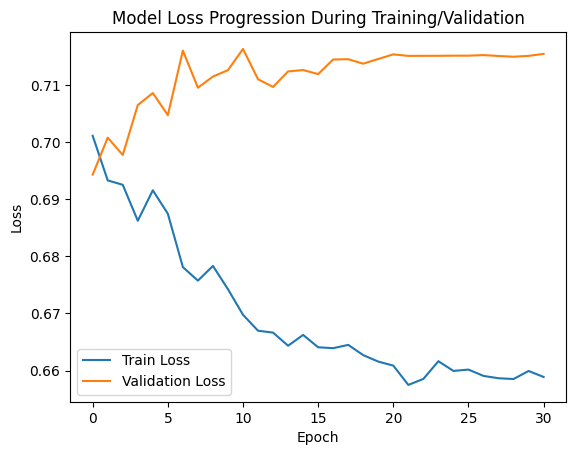

In [19]:
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Función para calcular el AUC-ROC y mostrarla junto a otras métricas de evaluación
def evaluate_model_with_auc(model, X_train, y_train, X_test, y_test):
    # Obtener la probabilidad de la clase positiva
    y_train_prob = model.predict(X_train)
    y_test_prob = model.predict(X_test)

    # Calcular AUC-ROC
    auc_train = roc_auc_score(y_train, y_train_prob)
    auc_test = roc_auc_score(y_test, y_test_prob)

    # Calcular otras métricas
    y_train_pred = (y_train_prob > 0.5).astype("int32")
    y_test_pred = (y_test_prob > 0.5).astype("int32")

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='binary')
    recall_train = recall_score(y_train, y_train_pred, average='binary')
    f1_train = f1_score(y_train, y_train_pred, average='binary')

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='binary')
    recall_test = recall_score(y_test, y_test_pred, average='binary')
    f1_test = f1_score(y_test, y_test_pred, average='binary')

    print(f"TRAIN Metrics - Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1: {f1_train:.4f}, AUC: {auc_train:.4f}")
    print(f"TEST Metrics - Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1: {f1_test:.4f}, AUC: {auc_test:.4f}")

# Llamar a la función de evaluación con AUC
evaluate_model_with_auc(model, X_train, y_train, X_test, y_test)


21/21 [==============================] - 2s 111ms/step
TRAIN Metrics - Accuracy: 0.5672, Precision: 0.5665, Recall: 0.9907, F1: 0.7208, AUC: 0.5014
TEST Metrics - Accuracy: 0.5388, Precision: 0.5400, Recall: 0.9887, F1: 0.6985, AUC: 0.5162


In [23]:
# Definir las rutas de guardado para el modelo, ajustadas para el nuevo formato y ruta deseada
model_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/TF_Models/my_nlp_model_tf'

# Guardar el modelo entrenado en el nuevo formato
model.save(model_path, save_format='tf')


In [25]:
import json

# Definir la ruta de guardado para el tokenizer
tokenizer_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/TF_Models/gru_v5.json'

# Guardar el tokenizer
tokenizer_json = tokenizer.to_json()
with open(tokenizer_path, 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [21]:
# # Definir las rutas de guardado para el modelo
# model_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/GRU_RNN/gru_5/gru_v5.h5'


# # Guardar el modelo entrenado
# model.save(model_path)

In [22]:
# import json

# # Definir la ruta de guardado para el tokenizer
# tokenizer_path = '/content/drive/My Drive/Javeriana/Medical_Error_Detection/Modelos/Pruebas_Rendimiento/Modelos_Descarga/GRU_RNN/gru_5/gru_v5.json'

# # Guardar el tokenizer
# tokenizer_json = tokenizer.to_json()
# with open(tokenizer_path, 'w', encoding='utf-8') as f:
#     f.write(json.dumps(tokenizer_json, ensure_ascii=False))
